# Real plane

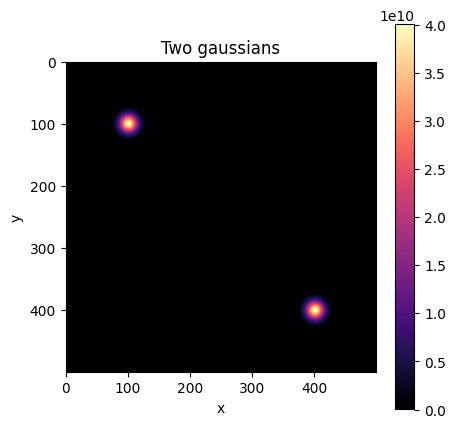

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la imagen
image_width = Nx = 500
image_height = Ny = 500

# Crear una matriz de píxeles de ejemplo
image = np.ones((image_height, image_width))


def gaussian_parameters(x_center, y_center, cov):
    # Coordenadas donde deseas agregar la función gaussiana
    mean_x = x_center
    mean_y = y_center
    cov = [[50, 0], [00, 50]]  # Matriz de covarianza
    # Calcular los valores de la función gaussiana en cada punto de la imagen
    x = np.arange(image_width) - mean_x
    y = np.arange(image_height) - mean_y
    return x, y
    
def gaussian(x, y, cov):
    # Calcular la función gaussiana en cada punto de la imagen
    gaussian_x = np.exp(-0.5 * (x ** 2 / cov[0][0]))
    gaussian_y = np.exp(-0.5 * (y ** 2 / cov[1][1]))
    gaussian = gaussian_x[:, np.newaxis] * gaussian_y[np.newaxis, :]
    return gaussian

# Definir parámetros de la función que queremos mostrar.
""" Gaussian 1"""
cov1 = [[100, 0], [0, 100]] 
mx1, my1 = 100, 100
x1, y1 = gaussian_parameters(mx1, my1, cov1)
g1 = gaussian(x1, y1, cov1)

"""Gaussian 2"""
cov2 = [[100, 0], [0, 100]] 
mx2, my2 = 400, 400
x2, y2 = gaussian_parameters(mx2, my2, cov2)
g2 = gaussian(x2, y2, cov2)

# Normalizar la función gaussiana para que los valores estén en el rango [0, 1]
g1 /= np.max(g1)
g2 /= np.max(g2)

# Ajustar la escala de la función gaussiana para que se pueda combinar con la imagen
g1 *= 0.4e11  # Suponiendo una imagen en escala de grises
g2 *= 0.4e11 

# la función gaussiana
imag_asym = image + g1 + g2

# Mostrar la imagen resultante
plt.figure(figsize=(5, 5))
plt.imshow(imag_asym, cmap='magma')
plt.title("Two gaussians")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
#plt.axis('off')
plt.show()

# Visibility plane

C:\Users\Hewlett-Packard\AppData\Local\Temp\ipykernel_3476\1821031171.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


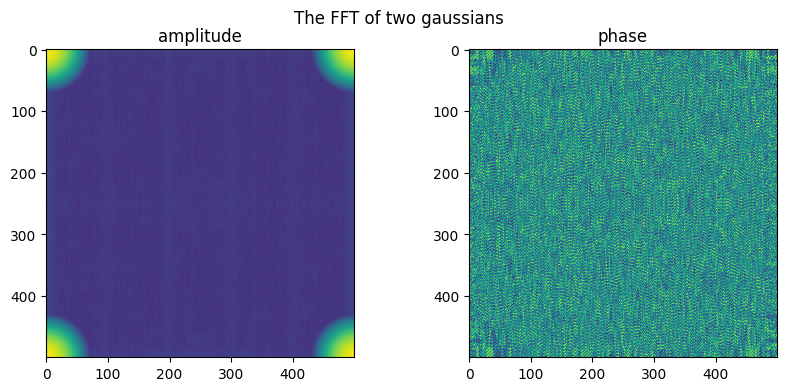

In [40]:
fftImagAsym = np.fft.fft2(imag_asym)
fig, axes = plt.subplots(figsize=(10,4))
plt.suptitle('The FFT of two gaussians')
plt.subplot(1,2,1)
plt.title("amplitude")
plt.imshow( 10. * np.log10(np.abs(fftImagAsym))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.title("phase")
plt.imshow( np.angle(fftImagAsym)) #phase
#fig.savefig("soccer_fft_gray.png", bbox_inches='tight', pad_inches=0)

<Figure size 1500x1500 with 0 Axes>

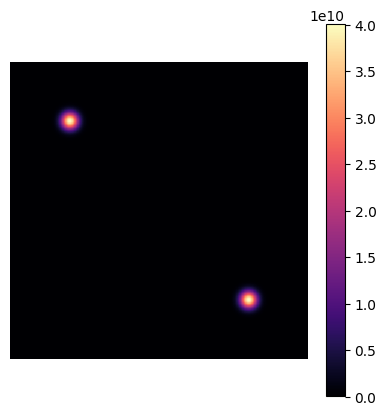

In [7]:
ifftImagAsym = np.fft.ifft2(fftImagAsym)
plt.figure(figsize=(15, 15))
plt.matshow(ifftImagAsym.real, cmap='magma')
plt.colorbar()
plt.axis('off')
plt.show()

In [8]:
xmax = 1.9
rad_to_arcsec = 3600 * 180 / np.pi
dx = dy = 2*xmax/(Nx*rad_to_arcsec)
du = (1/Nx)/dx
du

54280.21217028851

In [9]:
q1n = np.fft.fftfreq(Nx, d = dx) # is the same as FreqCompCols = np.fft.fftfreq(fftImagAsym.shape[1],d=dy)
q2n = np.fft.fftfreq(Ny, d = dy) # is the same as FreqCompRows = np.fft.fftfreq(fftImagAsym.shape[0],d=dx)
q1n, q2n = np.meshgrid(q1n, q2n, indexing='ij') 
u, v = q1n.reshape(-1), q2n.reshape(-1)

In [10]:
fftImagAsym.shape

(500, 500)

In [11]:
u.reshape(Nx, Ny)

array([[      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [  54280.21217029,   54280.21217029,   54280.21217029, ...,
          54280.21217029,   54280.21217029,   54280.21217029],
       [ 108560.42434058,  108560.42434058,  108560.42434058, ...,
         108560.42434058,  108560.42434058,  108560.42434058],
       ...,
       [-162840.63651087, -162840.63651087, -162840.63651087, ...,
        -162840.63651087, -162840.63651087, -162840.63651087],
       [-108560.42434058, -108560.42434058, -108560.42434058, ...,
        -108560.42434058, -108560.42434058, -108560.42434058],
       [ -54280.21217029,  -54280.21217029,  -54280.21217029, ...,
         -54280.21217029,  -54280.21217029,  -54280.21217029]])

In [12]:
v.reshape(Nx, Ny)

array([[      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029],
       [      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029],
       [      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029],
       ...,
       [      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029],
       [      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029],
       [      0.        ,   54280.21217029,  108560.42434058, ...,
        -162840.63651087, -108560.42434058,  -54280.21217029]])

In [13]:
Vis = np.ravel(fftImagAsym)

In [14]:
Re = Vis.real
Imag = Vis.imag

In [15]:
weights = np.ones(len(Vis))

In [16]:
dir_ = "../data/"
#np.savetxt(dir_ + "two_gaussians_gridded.txt", np.transpose([u, v, Re, Imag, weights]))

# Run Frank

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from frank.geometry import SourceGeometry
from frank.io import load_uvtable
from frank.radial_fitters import FrankFitter, FourierBesselFitter

In [18]:
# load data
u, v, Re, Imag, Weights = np.loadtxt(dir_ + "two_gaussians_gridded.txt", unpack = True)

In [19]:
Vis = Re + Imag*1j

In [20]:
import time
start_time = time.time()
N = 50
r_out = 1.9
FF = FourierBesselFitter(r_out, N)
sol_new = FF.fit(u, v, Vis, Weights)
print("--- %s minutes ---" % (time.time()/60 - start_time/60))

--- 14.200694981962442 minutes ---


In [23]:
dx = dy =  2*r_out/(N*rad_to_arcsec)
I = sol_new.mean.real/(dx*dy)
I_reshape = I.reshape((N,N))
r_out_rad = r_out

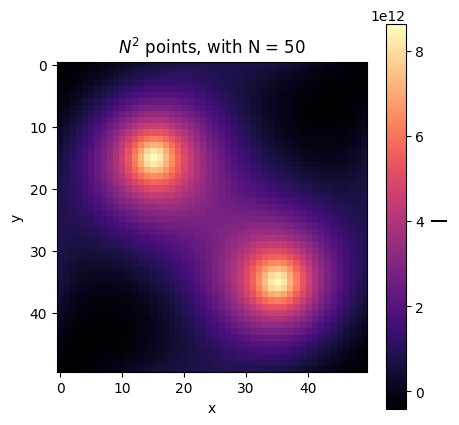

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(I_reshape, cmap="magma")
cmap = plt.colorbar(plot)
cmap.set_label(r'I', size = 15)
ax.set_title(r'$N^{2}$ points, with N = ' + str(N))
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()